# <font color='black'>Ensino Einstein</font>
## <font color='black'>Ciência de Dados e Informática para a Área da Saúde</font>
>### <font color='gray'>DATATHON</font>
>##### <font color='gray'>professor Rodrigo Signorini</font>

In [ ]:
# GRUPO 03 - BEATRIZ SILVA, BERNADETE CRISTINA, CASSIO MIRANDA, DENISE CAMPOS, ERNANE SILVA, PÂMELA COSTA

### Definição do Problema de Negócio

Com base em informações operacionais do Centro Cirúrgico de um grande hospital compreendendo o período completo de 2019 a 2020, onde todos os dados foram anonimizados seguindo as melhores práticas e recomendações internacionais, foi solicitado para efeitos de uma gestão mais eficiente a elaboração de informações analíticas para auxílio às tomadas de decisão. Tanto a produção de análises descritivas e indicadores quanto a automação de informações com caráter preditivo são esperados pela área como objetos dessa solicitação.

<font color='gray'>**IMPORTANTE**</font>

> Informações como procedimentos cirúrgicos mais realizados, tipo, porte, especialidade e duração das cirugias são de grande importância para a área.

### Base de Dados

Como parte da estratégia elaborada para esse DATATHON, a base de dados (em formato CSV) será disponibilizada em sala de aula no início das atividades.

### Prazos e Entrega

Os alunos poderão realizar a atividade de forma individual ou em grupo de até 5 pessoas. O prazo para a entrega é de até 15 dias corridos do início do DATATHON, devendo ser enviada por e-mail para rodrigosignorini@outlook.com. A entregua consiste em:

>*#1.* **_Notebook_**: Todo o processo de desenvolvimento deverá ser apresentado de forma bem estruturada, bem definida e muito bem embasada. Todo o percurso, desde a importação dos dados e suas respectivas análises e preparações para a devida entrega aos algoritmos de *Machine Learning* até a avaliação final do modelo escolhido, deve ser percorrido utilizando-se os conceitos, as técnicas e as ferramentas aprendidas em sala de aula.

>*#2.* **_Storytelling_**: Diferentemente do embasamento estritamente técnico apresentado via *notebook*, deverá ser entregue um documento - em plataforma a escolher - elaborado de forma que os resultados obtidos possam ser comunicados eficientemente a qualquer tipo de público, técnico ou não. Para tanto, elementos como um excelente entendimento sobre o contexto, a escolha de uma apresentação visual adequada, sem excessos e com foco nos objetivos são a chave para que se possa contar uma boa história com os dados.

Trecho do livro **Storytelling com Dados: Um guia sobre visualização de dados para profissionais de negócios** (*Cole Nussbaumer Knaflic*):

>_"...há uma distinção importante a fazer entre análise exploratória e explanatória. A análise exploratória é a que você faz para compreender os dados e descobrir o que pode ser digno de nota ou interessante a destacar para outras pessoas. Quando fazemos uma análise exploratória, é como procurar pérolas em ostras. Talvez precisemos abrir 100 ostras (testar 100 diferentes hipóteses ou examinar os dados de 100 diferentes maneiras) para encontrar, digamos, duas pérolas.
Quando estamos a ponto de comunicar nossa análise para nosso público, queremos estar no espaço explanatório, significando que você tem algo específico que deseja explicar, uma história específica que deseja contar — provavelmente sobre aquelas duas pérolas.
Com muita frequência, as pessoas se enganam e pensam que podem mostrar uma análise exploratória (simplesmente apresentar os dados, todas as 100 ostras), quando deveriam mostrar a explanatória (dedicar tempo para transformar os dados em informações que possam ser consumidas por um público: as duas pérolas). É um erro compreensível. Depois de se fazer toda uma análise, pode ser tentador mostrá-la inteira ao seu público, como evidência de todo o trabalho que você fez e da robusteza da análise. Resista a esse desejo. Você estaria fazendo seu público reabrir todas as ostras! Concentre-se nas pérolas, a informação que seu público precisa saber."_

#### *** Dúvidas durante o desenvolvimeto das atividades devem ser enviadas para:
> rodrigosignorini@outlook.com

#### Estratégia Macro da Análise

> Endender problema de negócio;

> Preparar e estudar a base de dados;

> Realizar tratativas e preparação da base para análise descritiva;

> Análise descritiva;

> Preparação para algoritmo de previsão, dado o problema de negócio temos:
>> Algoritmo 1: Previsão do tempo do procedimento cirúrgico (antes do procedimento iniciar);

>> Algoritmo 2: Nova previsão do tempo do procedimento (após o inicio do procedimento), caso ocorra um intercorrância;

> Entregáveis: Painél de Dados (BI) com métricas e indicadores para acompanhamento gerencial do problema de negócio + conjunto de algoritmos de ML para apoio do processo + material de apresentação do projeto (pdf)

>>> 

Import das bibliotecas a serem utilizadas

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from datetime import datetime, timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Montagem do espaço de trabalho



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/My Drive/Datathon')

Leitura da Base de Dados

In [ ]:
df_raw = pd.read_csv('ex.CSV', sep=';', encoding="latin_1")

In [ ]:
df_raw.head()

,Prontuario2,DT_Nascimento,Sexo,Estado_Civil,Bairro,Cidade,Estado,Passagem2,DT_ADMISSAO,HR_ADMISSAO,DT_ALTA,HR_ALTA,Tipo_Admissao,CID,Desc_CID,Grupo_Diagnostico,Cod_ITEM,Desc_ITEM,DESC_CAT_ITEM,DESC_CAT_SERV,SUB_CAT_ITEM,FLG_OPME,Dt_Lancamento_Item,QTDE_ITEM,Valor_Custo_ITEM2
0,450644688,16/12/1957,Feminino,NaN,TAMBORE,SANTANA DE PARNAIBA,São Paulo,6725682912,11/12/2019,08:51,11/12/2019,23:59,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,11/12/2019,1,"11,86338462"
1,580296600,08/01/1984,Feminino,NaN,TAMBORE,SANTANA DE PARNAIBA,São Paulo,6716550672,06/12/2019,09:24,06/12/2019,00:00,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,06/12/2019,1,"11,86338462"
2,678268656,20/01/1978,Masculino,NaN,ITAIM BIBI,SAO PAULO,São Paulo,6711620448,04/12/2019,10:22,04/12/2019,00:00,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,04/12/2019,1,"11,86338462"
3,805588992,10/02/1989,Feminino,NaN,ALPHAVILLE CONDE II,BARUERI,São Paulo,6709449864,05/12/2019,07:25,05/12/2019,00:00,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,05/12/2019,1,"11,86338462"
4,381520152,20/12/1973,Masculino,NaN,Alphaville,SANTANA DE PARNAIBA,São Paulo,6725498208,11/12/2019,07:27,11/12/2019,00:00,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,11/12/2019,1,"11,86338462"


In [ ]:
df_raw.shape

(39468, 17)

Redução da Base de Dados pela exclusão das observações nulas

In [ ]:
df_raw.notnull().sum()

Unnamed: 0                     39468
nascimento                     39468
sexo                           39468
data_entrada                   39468
data_saida                     39129
tipo_atendimento               39468
tipo_passagem                  39468
procedimento_cirurgico         39468
especialidade_procedimento     39468
tecnica_cirurgica              39468
potencial_contaminacao         38115
porte                          38886
medico                         39468
especialidade_cirurgiao        39468
asa                            39468
intercorrencia_intraop         39468
tipo_intercorrencia_intraop    39468
dtype: int64

In [ ]:
df_raw = df_raw[df_raw['data_saida'].notna()]

In [ ]:
df_raw.shape

(39129, 17)

Cálculo da diferença da data de entrada pela data de saída em horas

In [ ]:
df_raw['variacao_entrada_saida'] = (pd.to_datetime(df_raw.data_saida) - pd.to_datetime(df_raw.data_entrada)).dt.total_seconds()/3600

In [ ]:
df_raw['idade'] = ((datetime.now() - pd.to_datetime(df_raw['nascimento'])).dt.days/365).astype(int)

Remoção dos valores negativos (onde a data de saída é menor que a data de entrada)

In [ ]:
df_raw = df_raw[df_raw['variacao_entrada_saida'] >= 0]

In [ ]:
df_raw.shape

(39121, 19)

In [ ]:
df_raw.notnull().sum()

Unnamed: 0                     39121
nascimento                     39121
sexo                           39121
data_entrada                   39121
data_saida                     39121
tipo_atendimento               39121
tipo_passagem                  39121
procedimento_cirurgico         39121
especialidade_procedimento     39121
tecnica_cirurgica              39121
potencial_contaminacao         37771
porte                          38539
medico                         39121
especialidade_cirurgiao        39121
asa                            39121
intercorrencia_intraop         39121
tipo_intercorrencia_intraop    39121
variacao_entrada_saida         39121
idade                          39121
dtype: int64

Redução por demais fatores (como são poucas variáveis não vale o risco de assumir os valores nulos como não informados)

In [ ]:
df_raw = df_raw[df_raw['potencial_contaminacao'].notna()]

In [ ]:
df_raw.shape

(37771, 19)

In [ ]:
df_raw.notnull().sum()

Unnamed: 0                     37771
nascimento                     37771
sexo                           37771
data_entrada                   37771
data_saida                     37771
tipo_atendimento               37771
tipo_passagem                  37771
procedimento_cirurgico         37771
especialidade_procedimento     37771
tecnica_cirurgica              37771
potencial_contaminacao         37771
porte                          37218
medico                         37771
especialidade_cirurgiao        37771
asa                            37771
intercorrencia_intraop         37771
tipo_intercorrencia_intraop    37771
variacao_entrada_saida         37771
idade                          37771
dtype: int64

In [ ]:
df_raw = df_raw[df_raw['porte'].notna()]

Tratativas dos outlyers (regra assumida: cirurgias, que não são parto, com corte máximo de 12h e mínimo de 30min)

In [ ]:
 def convert(row):
  if  (str(row['procedimento_cirurgico']) != 'Parto (via vaginal)') and \
      (row['variacao_entrada_saida'] > 12 or row['variacao_entrada_saida'] < 0.5):
     return True
  elif (str(row['procedimento_cirurgico']) == 'Parto (via vaginal)' and row['variacao_entrada_saida'] > 24):
     return True
  else:
     return False

 df_raw.loc[df_raw.apply(convert, axis=1) == True, 'classificacao_tempo'] = 'inválido'
 df_raw.loc[df_raw.apply(convert, axis=1) == False, 'classificacao_tempo'] = 'válido'

In [ ]:
df_raw.shape

(37218, 20)

Ajustes de nomenclaturas das váriaives classificadas

In [ ]:
df_raw.describe(include='all')

,Unnamed: 0,nascimento,sexo,data_entrada,data_saida,tipo_atendimento,tipo_passagem,procedimento_cirurgico,especialidade_procedimento,tecnica_cirurgica,potencial_contaminacao,porte,medico,especialidade_cirurgiao,asa,intercorrencia_intraop,tipo_intercorrencia_intraop,variacao_entrada_saida,idade,classificacao_tempo
count,37218.000000,37218,37218,37218,37218,37218,37218,37218,37218,37218,37218,37218,37218,37218,37218,37218,37218,37218.000000,37218.000000,37218
unique,NaN,17900,5,33428,33425,35,3,1112,58,10,8,10,2415,32,7,3,22,NaN,NaN,2
top,NaN,1982-03-26,Feminino,2019-10-25 13:34:26,2020-07-25 14:01:11,Clinica Cirurgica,INTERNADO,Cesariana,Ginecologia e Obstetrícia,Convencional,CLASSE II - POTENCIALMENTE CONTAMINADA,P3,Cauê da Mota,GINECOLOGIA E OBSTETRÍCIA,II,Não,Não Informado,NaN,NaN,válido
freq,NaN,16,22921,4,4,15543,36792,4449,9594,17757,20822,16157,564,10557,19625,34127,36047,NaN,NaN,36594
mean,17188.888710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.825378,45.871487,NaN
std,10038.343384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.476622,20.212967,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022778,0.000000,NaN
25%,8456.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.204236,35.000000,NaN
50%,17097.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.758056,43.000000,NaN
75%,25801.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.780833,60.000000,NaN


In [ ]:
df_raw.groupby(['sexo']).size()

sexo
Desconhecido        1
FEMININO           27
Feminino        22921
MASCULINO          11
Masculino       14258
dtype: int64

In [ ]:
def convert1(row):
  if str(row['sexo']).lower() == 'feminino':
      return 'F'
  else:
      return 'M'

df_raw['sexo'] = df_raw.apply(convert1, axis=1)

In [ ]:
df_raw.groupby(['sexo']).size() #variável ajustada

sexo
F    22948
M    14270
dtype: int64

In [ ]:
df_raw.groupby(['intercorrencia_intraop']).size()

intercorrencia_intraop
Não              34127
Não Informado     1798
Sim               1293
dtype: int64

In [ ]:
def convert2(row):
  if str(row['intercorrencia_intraop']) == 'Sim':
      return 'S'
  else:
      return 'N'

df_raw['intercorrencia_intraop'] = df_raw.apply(convert2, axis=1)

In [ ]:
df_raw.groupby(['intercorrencia_intraop']).size() #variável ajustada

intercorrencia_intraop
N    35925
S     1293
dtype: int64

In [ ]:
df_raw.groupby(['tipo_passagem']).size() #Ok

tipo_passagem
EMERGÊNCIA       20
EXTERNO         406
INTERNADO     36792
dtype: int64

In [ ]:
df_raw.groupby(['tecnica_cirurgica']).size()

tecnica_cirurgica
Convencional                  17757
Convencional, Convencional        5
Convencional, Vídeo              45
Não Informado                 11568
Robótica                        447
Robótica, Vídeo                   2
Vídeo                          7298
Vídeo, Convencional              86
Vídeo, Robótica                   5
Vídeo, Vídeo                      5
dtype: int64

In [ ]:
#CONVENCIONAL = Convencional + Não informação + Convencional Vídeo + Vídeo Convencional (Adeno)
#VÍDEO = Robótica Vídeo  + Vídeo Convencional (Resto) + Vídeo Robótica
#ROBÓTICA = Robótica

def convert3(row):
  if str(row['tecnica_cirurgica']) == 'Convencional'\
    or str(row['tecnica_cirurgica']) == 'Convencional, Convencional'\
    or str(row['tecnica_cirurgica']) == 'Não Informado'\
    or str(row['tecnica_cirurgica']) == 'Convencional, Vídeo':
    return 'Convencional'
  elif str(row['tecnica_cirurgica']) == 'Vídeo, Convencional'\
    and str(row['procedimento_cirurgico']) == 'Adeno-amigdalectomia':
    return 'Convencional' 
  elif str(row['tecnica_cirurgica']) == 'Vídeo'\
    or str(row['tecnica_cirurgica']) == 'Robótica, Vídeo'\
    or str(row['tecnica_cirurgica']) == 'Vídeo, Robótica':
    return 'Vídeo'
  elif str(row['tecnica_cirurgica']) == 'Vídeo, Convencional'\
    and str(row['procedimento_cirurgico']) != 'Adeno-amigdalectomia':
    return 'Vídeo' 
  elif str(row['tecnica_cirurgica']) == 'Robótica':
    return 'Robótica'
  
df_raw['tecnica_cirurgica'] = df_raw.apply(convert3, axis=1)

In [ ]:
df_raw.groupby(['tecnica_cirurgica']).size() #variável ajustada

tecnica_cirurgica
Convencional    29397
Robótica          447
Vídeo            7369
dtype: int64

In [ ]:
df_raw.groupby(['potencial_contaminacao']).size()

potencial_contaminacao
CLASSE I - LIMPA                          12817
CLASSE II - POTENCIALMENTE CONTAMINADA    20822
CLASSE III - CONTAMINADA                    224
CLASSE IV - INFECTADA                       820
ClASSE III - CONTAMINADA                    394
Classe I - Limpa                            543
Classe II - Potencialmente Contaminada     1589
Classe IV - Infectada                         9
dtype: int64

In [ ]:
def convert4(row):
  if str(row['potencial_contaminacao']).lower() == 'classe i - limpa':
      return 'classe1_limpa'
  elif str(row['potencial_contaminacao']).lower() == 'classe ii - potencialmente contaminada':
      return 'classe2_poten_contaminada'
  elif str(row['potencial_contaminacao']).lower() == 'classe iii - contaminada':
      return 'classe3_contaminada'    
  elif str(row['potencial_contaminacao']).lower() == 'classe iv - infectada':
      return 'classe4_infectada'    

df_raw['potencial_contaminacao'] = df_raw.apply(convert4, axis=1)

In [ ]:
df_raw.groupby(['potencial_contaminacao']).size() #variável ajustada

potencial_contaminacao
classe1_limpa                13360
classe2_poten_contaminada    22411
classe3_contaminada            618
classe4_infectada              829
dtype: int64

In [ ]:
df_raw.groupby(['especialidade_procedimento']).size() #1649 não informados (alocado em cirurgia geral)

especialidade_procedimento
Anestesiologia                          561
Anestesiologia/Neurocirurgia              5
Buco-Maxilo-Facial                       45
Cabeça e Pescoço                        873
Cabeça e Pescoço/Plástica                20
Cancerologia Cirúrgica                    1
Cardiologia                               1
Cardiovascular                          350
Cirurgia Geral                         5709
Cirurgia Geral/Ginecologia/Urologia      64
Cirurgia Geral/Plástica                  10
Cirurgia Geral/Urologia                  28
Cirurgia Pediátrica                     122
Cirurgia Plástica                       117
Cirurgia Torácica                       327
Cirurgia Vascular                      2135
Cirurgia do Aparelho Digestivo           14
Coloproctologia                          62
Cranio-Maxilo-Facial                      4
Cranio-Maxilo-Facial/Cabeça e Pesco       5
Dermatologia                            563
Dermatologia/Plástica                  1092
Endos

In [ ]:
df_raw['especialidade_procedimento'].describe()

count                         37218
unique                           58
top       Ginecologia e Obstetrícia
freq                           9594
Name: especialidade_procedimento, dtype: object

In [ ]:
df_raw['especialidade_procedimento'] = df_raw['especialidade_procedimento'].str.lower()

In [ ]:
def convert5(row):
  if 'vascular' in str(row['especialidade_procedimento']):
    return 'vascular'
  elif 'urologia' in str(row['especialidade_procedimento']):
    return 'urologia' 
  elif 'radioterapia' in str(row['especialidade_procedimento']):
    return 'radioterapia'
  elif 'proctologia' in str(row['especialidade_procedimento']):
    return 'proctologia'
  elif 'plástica' in str(row['especialidade_procedimento']):
    return 'plástica'
  elif 'otorrinolaringologia' in str(row['especialidade_procedimento']):
    return 'otorrinolaringologia'
  elif 'ortopedia' in str(row['especialidade_procedimento']):
    return 'ortopedia'
  elif 'oncologia' in str(row['especialidade_procedimento']):
    return 'oncologia'
  elif 'oftalmologia' in str(row['especialidade_procedimento']):
    return 'oftalmologia'
  elif 'odontologia' in str(row['especialidade_procedimento']):
    return 'odontologia'
  elif 'neurologia' in str(row['especialidade_procedimento']):
    return 'neurologia'
  elif 'neurocirurgia' in str(row['especialidade_procedimento']):
    return 'neurocirurgia'
  elif 'nefrologia' in str(row['especialidade_procedimento']):
    return 'nefrologia'
  elif 'mastologia' in str(row['especialidade_procedimento']):
    return 'mastologia'
  elif 'hematologia' in str(row['especialidade_procedimento']):
    return 'hematologia'
  elif 'ginecologia' in str(row['especialidade_procedimento']):
    return 'ginecologia'
  elif 'endoscopia' in str(row['especialidade_procedimento']):
    return 'endoscopia'
  elif 'dermatologia' in str(row['especialidade_procedimento']):
    return 'dermatologia'
  elif 'cranio-maxilo-facial' in str(row['especialidade_procedimento']):
    return 'cranio-maxilo-facial'
  elif 'coloproctologia' in str(row['especialidade_procedimento']):
    return 'coloproctologia'
  elif 'cirurgia do aparelho digestivo' in str(row['especialidade_procedimento']):
    return 'cirurgia do aparelho digestivo'
  elif 'cirurgia torácica' in str(row['especialidade_procedimento']):
    return 'cirurgia torácica'
  elif 'cirurgia pediátrica' in str(row['especialidade_procedimento']):
    return 'cirurgia pediátrica'
  elif 'urologia' in str(row['especialidade_procedimento']):
    return 'urologia'
  elif 'cirurgia geral' in str(row['especialidade_procedimento']):
    return 'cirurgia geral'
  elif 'outra' in str(row['especialidade_procedimento']):
    return 'cirurgia geral'
  elif 'não informado' in str(row['especialidade_procedimento']):
    return 'cirurgia geral'    
  elif 'cardiovascular' in str(row['especialidade_procedimento']):
    return 'cardiovascular'
  elif 'cancerologia cirúrgica' in str(row['especialidade_procedimento']):
    return 'cancerologia cirúrgica'
  elif 'cabeça e pescoço' in str(row['especialidade_procedimento']):
    return 'cabeça e pescoço'
  elif 'buco-maxilo-facial' in str(row['especialidade_procedimento']):
    return 'buco-maxilo-facial'
  elif 'anestesiologia' in str(row['especialidade_procedimento']):
    return 'anestesiologia'
  elif 'gastroenterologia' in str(row['especialidade_procedimento']):
    return 'gastroenterologia' 
  elif 'cardiologia' in str(row['especialidade_procedimento']):
    return 'cardiologia'	

df_raw['especialidade_procedimento'] = df_raw.apply(convert5, axis=1)

In [ ]:
df_raw['especialidade_procedimento'].describe()

count           37218
unique             28
top       ginecologia
freq             9653
Name: especialidade_procedimento, dtype: object

In [ ]:
df_raw.groupby(['especialidade_procedimento']).size() #variável ajustada

especialidade_procedimento
anestesiologia                     561
buco-maxilo-facial                  45
cabeça e pescoço                   873
cancerologia cirúrgica               1
cardiologia                          1
cirurgia do aparelho digestivo      14
cirurgia geral                    7444
cirurgia pediátrica                122
cirurgia torácica                  327
cranio-maxilo-facial                 9
dermatologia                       563
endoscopia                           2
gastroenterologia                   57
ginecologia                       9653
hematologia                         23
mastologia                         147
nefrologia                          17
neurocirurgia                      608
odontologia                         73
oftalmologia                      2068
oncologia                            1
ortopedia                         2397
otorrinolaringologia               748
plástica                          3541
proctologia                        75

In [ ]:
df_raw.groupby(['asa']).size() #1808 não informado (não é possível aproveitamento)

asa
I                12476
II               19625
III               2935
IV                 349
Não Informado     1808
V                   22
VI                   3
dtype: int64

In [ ]:
df_raw.groupby(['especialidade_cirurgiao']).size() #415 não informado (não é possível aproveitamento)

especialidade_cirurgiao
ANESTESIOLOGIA                       68
CANCEROLOGIA CIRÚRGICA               81
CARDIOLOGIA                          36
CIRURGIA BUCO-MAXILO-FACIAL         132
CIRURGIA CARDIOVASCULAR             637
CIRURGIA CRÂNIO-MAXILO-FACIAL         1
CIRURGIA DA CABEÇA E PESCOÇO        481
CIRURGIA DE MÃO                      32
CIRURGIA DO APARELHO DIGESTIVO     3332
CIRURGIA GERAL                     3083
CIRURGIA PEDIATRICA                1130
CIRURGIA PLÁSTICA                  3438
CIRURGIA TORÁCICA                   297
CIRURGIA VASCULAR                  1761
CLÍNICA MÉDICA                        4
COLOPROCTOLOGIA                     281
DERMATOLOGIA                        371
ENDOSCOPIA                            1
GERIATRIA                             1
GINECOLOGIA E OBSTETRÍCIA         10557
HEMATOLOGIA E HEMOTERAPIA            23
MASTOLOGIA                          242
NEUROCIRURGIA                       516
Não Informado                       415
ODONTOLOGIA     

Remover linhas com observações duplicadas

In [ ]:
df_raw = df_raw.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_raw.shape

(37218, 19)

In [ ]:
df_ml = df_raw.drop_duplicates()

In [ ]:
df_ml.shape

(33460, 19)

Criação da base para PBI (acomanhamento das métricas e indicadores facilitado da equipe)

In [ ]:
df_ml.to_excel("dataset_PBI.xlsx")

----------------------------------------------------------------------

ALGORITMO 1: Inicia a tratativa descritiva para preparação da base com fim para o algoritmo

In [ ]:
df_ml = df_ml[df_ml['classificacao_tempo'] == 'válido'] #Valores válidos

Seleção apenas das variáveis que foram selecionadas para utilização e reordenação do dataset

In [ ]:
df_ml = df_ml[['sexo','tipo_passagem','tecnica_cirurgica','potencial_contaminacao','especialidade_procedimento','asa','idade','variacao_entrada_saida','intercorrencia_intraop',	'tipo_intercorrencia_intraop']]

In [ ]:
df_ml.head(5)

,sexo,tipo_passagem,tecnica_cirurgica,potencial_contaminacao,especialidade_procedimento,asa,idade,variacao_entrada_saida,intercorrencia_intraop,tipo_intercorrencia_intraop
0,F,INTERNADO,Convencional,classe2_poten_contaminada,cabeça e pescoço,I,24,3.030278,N,Não Informado
1,F,INTERNADO,Convencional,classe1_limpa,neurocirurgia,II,56,8.513611,N,Não Informado
2,M,INTERNADO,Vídeo,classe1_limpa,neurocirurgia,II,56,4.118333,N,Não Informado
3,M,INTERNADO,Vídeo,classe2_poten_contaminada,cirurgia geral,II,33,3.380000,N,Não Informado
4,F,INTERNADO,Convencional,classe1_limpa,ortopedia,I,56,2.909167,N,Não Informado


> Tranformação da variável sexo em dummy (como é uma variável binária, ao transformar em dummy, "sexo_F" e "sexo_M" podemos excluir uma delas, pois é complementar uma da outra, para evitar problemas de colinearidade. Ficando assim, apenas com a variável sexo)

In [ ]:
def convert5(row):
  if str(row['sexo']) == 'F':
      return 0
  else:
      return 1

df_ml['sexo'] = df_ml.apply(convert5, axis=1)

In [ ]:
df_ml.head(5)

,sexo,tipo_passagem,tecnica_cirurgica,potencial_contaminacao,especialidade_procedimento,asa,idade,variacao_entrada_saida,intercorrencia_intraop,tipo_intercorrencia_intraop
0,0,INTERNADO,Convencional,classe2_poten_contaminada,cabeça e pescoço,I,24,3.030278,N,Não Informado
1,0,INTERNADO,Convencional,classe1_limpa,neurocirurgia,II,56,8.513611,N,Não Informado
2,1,INTERNADO,Vídeo,classe1_limpa,neurocirurgia,II,56,4.118333,N,Não Informado
3,1,INTERNADO,Vídeo,classe2_poten_contaminada,cirurgia geral,II,33,3.380000,N,Não Informado
4,0,INTERNADO,Convencional,classe1_limpa,ortopedia,I,56,2.909167,N,Não Informado


Tranformação da variável tipo_passagem em dummy 

In [ ]:
# visualizando as categorias
df_ml.tipo_passagem.value_counts()

INTERNADO     32527
EXTERNO         363
EMERGÊNCIA       17
Name: tipo_passagem, dtype: int64

In [ ]:
# criando as variáveis dummies
df_dummy = pd.get_dummies(df_ml['tipo_passagem'], prefix='tp', prefix_sep='_')
df_dummy.head()

,tp_EMERGÊNCIA,tp_EXTERNO,tp_INTERNADO
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
# concatenando os DataFrames
df_ml = pd.concat([df_ml, df_dummy], axis=1)
print(df_ml.shape)
display(df_ml.head())

(32907, 13)


,sexo,tipo_passagem,tecnica_cirurgica,potencial_contaminacao,especialidade_procedimento,asa,idade,variacao_entrada_saida,intercorrencia_intraop,tipo_intercorrencia_intraop,tp_EMERGÊNCIA,tp_EXTERNO,tp_INTERNADO
0,0,INTERNADO,Convencional,classe2_poten_contaminada,cabeça e pescoço,I,24,3.030278,N,Não Informado,0,0,1
1,0,INTERNADO,Convencional,classe1_limpa,neurocirurgia,II,56,8.513611,N,Não Informado,0,0,1
2,1,INTERNADO,Vídeo,classe1_limpa,neurocirurgia,II,56,4.118333,N,Não Informado,0,0,1
3,1,INTERNADO,Vídeo,classe2_poten_contaminada,cirurgia geral,II,33,3.380000,N,Não Informado,0,0,1
4,0,INTERNADO,Convencional,classe1_limpa,ortopedia,I,56,2.909167,N,Não Informado,0,0,1


In [ ]:
# removendo uma variável
df_ml = df_ml.drop(['tp_EMERGÊNCIA'], axis=1)

Tranformação da variável tecnica_cirurgica em dummy

In [ ]:
# visualizando as categorias
df_ml.tecnica_cirurgica.value_counts()

Convencional    26007
Vídeo            6505
Robótica          390
Name: tecnica_cirurgica, dtype: int64

In [ ]:
# criando as variáveis dummies
df_dummy = pd.get_dummies(df_ml['tecnica_cirurgica'], prefix='tc', prefix_sep='_')
df_dummy.head()

,tc_Convencional,tc_Robótica,tc_Vídeo
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0


In [ ]:
# concatenando os DataFrames
df_ml = pd.concat([df_ml, df_dummy], axis=1)
print(df_ml.shape)
display(df_ml.head())

(32907, 15)


,sexo,tipo_passagem,tecnica_cirurgica,potencial_contaminacao,especialidade_procedimento,asa,idade,variacao_entrada_saida,intercorrencia_intraop,tipo_intercorrencia_intraop,tp_EXTERNO,tp_INTERNADO,tc_Convencional,tc_Robótica,tc_Vídeo
0,0,INTERNADO,Convencional,classe2_poten_contaminada,cabeça e pescoço,I,24,3.030278,N,Não Informado,0,1,1,0,0
1,0,INTERNADO,Convencional,classe1_limpa,neurocirurgia,II,56,8.513611,N,Não Informado,0,1,1,0,0
2,1,INTERNADO,Vídeo,classe1_limpa,neurocirurgia,II,56,4.118333,N,Não Informado,0,1,0,0,1
3,1,INTERNADO,Vídeo,classe2_poten_contaminada,cirurgia geral,II,33,3.380000,N,Não Informado,0,1,0,0,1
4,0,INTERNADO,Convencional,classe1_limpa,ortopedia,I,56,2.909167,N,Não Informado,0,1,1,0,0


In [ ]:
# removendo uma variável
df_ml = df_ml.drop(['tc_Robótica'], axis=1)

Tranformação da variável asa em dummy 

In [ ]:
# visualizando as categorias
df_ml.asa.value_counts()

II               17381
I                11068
III               2588
Não Informado     1544
IV                 303
V                   21
VI                   2
Name: asa, dtype: int64

In [ ]:
# reduzindo os valores não informados
df_ml = df_ml[df_ml['asa'] != 'Não Informado']
df_ml.asa.value_counts()

II     17381
I      11068
III     2588
IV       303
V         21
VI         2
Name: asa, dtype: int64

In [ ]:
# criando as variáveis dummies
df_dummy = pd.get_dummies(df_ml['asa'], prefix='asa', prefix_sep='_')
df_dummy.head()

,asa_I,asa_II,asa_III,asa_IV,asa_V,asa_VI
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [ ]:
# concatenando os DataFrames
df_ml = pd.concat([df_ml, df_dummy], axis=1)
print(df_ml.shape)
display(df_ml.head())

(31363, 20)


,sexo,tipo_passagem,tecnica_cirurgica,potencial_contaminacao,especialidade_procedimento,asa,idade,variacao_entrada_saida,intercorrencia_intraop,tipo_intercorrencia_intraop,tp_EXTERNO,tp_INTERNADO,tc_Convencional,tc_Vídeo,asa_I,asa_II,asa_III,asa_IV,asa_V,asa_VI
0,0,INTERNADO,Convencional,classe2_poten_contaminada,cabeça e pescoço,I,24,3.030278,N,Não Informado,0,1,1,0,1,0,0,0,0,0
1,0,INTERNADO,Convencional,classe1_limpa,neurocirurgia,II,56,8.513611,N,Não Informado,0,1,1,0,0,1,0,0,0,0
2,1,INTERNADO,Vídeo,classe1_limpa,neurocirurgia,II,56,4.118333,N,Não Informado,0,1,0,1,0,1,0,0,0,0
3,1,INTERNADO,Vídeo,classe2_poten_contaminada,cirurgia geral,II,33,3.380000,N,Não Informado,0,1,0,1,0,1,0,0,0,0
4,0,INTERNADO,Convencional,classe1_limpa,ortopedia,I,56,2.909167,N,Não Informado,0,1,1,0,1,0,0,0,0,0


In [ ]:
# removendo uma variável
df_ml = df_ml.drop(['asa_VI'], axis=1)

Tranformação da variável especialidade_procedimento em dummy 

In [ ]:
# visualizando as categorias
df_ml.especialidade_procedimento.value_counts()

ginecologia                       8170
cirurgia geral                    6427
urologia                          3740
plástica                          2884
vascular                          2145
ortopedia                         2095
oftalmologia                      1761
cabeça e pescoço                   733
otorrinolaringologia               666
proctologia                        666
neurocirurgia                      523
anestesiologia                     495
dermatologia                       341
cirurgia torácica                  273
mastologia                         128
cirurgia pediátrica                102
odontologia                         63
gastroenterologia                   46
buco-maxilo-facial                  40
hematologia                         22
nefrologia                          15
cirurgia do aparelho digestivo      12
cranio-maxilo-facial                 8
radioterapia                         3
endoscopia                           2
oncologia                

In [ ]:
# criando as variáveis dummies
df_dummy = pd.get_dummies(df_ml['especialidade_procedimento'], prefix='espec_proc', prefix_sep='_')
df_dummy.head()

,espec_proc_anestesiologia,espec_proc_buco-maxilo-facial,espec_proc_cabeça e pescoço,espec_proc_cancerologia cirúrgica,espec_proc_cardiologia,espec_proc_cirurgia do aparelho digestivo,espec_proc_cirurgia geral,espec_proc_cirurgia pediátrica,espec_proc_cirurgia torácica,espec_proc_cranio-maxilo-facial,espec_proc_dermatologia,espec_proc_endoscopia,espec_proc_gastroenterologia,espec_proc_ginecologia,espec_proc_hematologia,espec_proc_mastologia,espec_proc_nefrologia,espec_proc_neurocirurgia,espec_proc_odontologia,espec_proc_oftalmologia,espec_proc_oncologia,espec_proc_ortopedia,espec_proc_otorrinolaringologia,espec_proc_plástica,espec_proc_proctologia,espec_proc_radioterapia,espec_proc_urologia,espec_proc_vascular
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# concatenando os DataFrames
df_ml = pd.concat([df_ml, df_dummy], axis=1)
print(df_ml.shape)
display(df_ml.head())

(31363, 47)


,sexo,tipo_passagem,tecnica_cirurgica,potencial_contaminacao,especialidade_procedimento,asa,idade,variacao_entrada_saida,intercorrencia_intraop,tipo_intercorrencia_intraop,tp_EXTERNO,tp_INTERNADO,tc_Convencional,tc_Vídeo,asa_I,asa_II,asa_III,asa_IV,asa_V,espec_proc_anestesiologia,espec_proc_buco-maxilo-facial,espec_proc_cabeça e pescoço,espec_proc_cancerologia cirúrgica,espec_proc_cardiologia,espec_proc_cirurgia do aparelho digestivo,espec_proc_cirurgia geral,espec_proc_cirurgia pediátrica,espec_proc_cirurgia torácica,espec_proc_cranio-maxilo-facial,espec_proc_dermatologia,espec_proc_endoscopia,espec_proc_gastroenterologia,espec_proc_ginecologia,espec_proc_hematologia,espec_proc_mastologia,espec_proc_nefrologia,espec_proc_neurocirurgia,espec_proc_odontologia,espec_proc_oftalmologia,espec_proc_oncologia,espec_proc_ortopedia,espec_proc_otorrinolaringologia,espec_proc_plástica,espec_proc_proctologia,espec_proc_radioterapia,espec_proc_urologia,espec_proc_vascular
0,0,INTERNADO,Convencional,classe2_poten_contaminada,cabeça e pescoço,I,24,3.030278,N,Não Informado,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,INTERNADO,Convencional,classe1_limpa,neurocirurgia,II,56,8.513611,N,Não Informado,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,INTERNADO,Vídeo,classe1_limpa,neurocirurgia,II,56,4.118333,N,Não Informado,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,INTERNADO,Vídeo,classe2_poten_contaminada,cirurgia geral,II,33,3.380000,N,Não Informado,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,INTERNADO,Convencional,classe1_limpa,ortopedia,I,56,2.909167,N,Não Informado,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# removendo uma variável
df_ml = df_ml.drop(['espec_proc_urologia'], axis=1)

Tranformação da variável potencial_contaminaca em dummy 

In [ ]:
# visualizando as categorias
df_ml.potencial_contaminacao.value_counts()

classe2_poten_contaminada    19084
classe1_limpa                11056
classe4_infectada              696
classe3_contaminada            527
Name: potencial_contaminacao, dtype: int64

In [ ]:
# criando as variáveis dummies
df_dummy = pd.get_dummies(df_ml['potencial_contaminacao'], prefix='pot_cont', prefix_sep='_')
df_dummy.head()

,pot_cont_classe1_limpa,pot_cont_classe2_poten_contaminada,pot_cont_classe3_contaminada,pot_cont_classe4_infectada
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [ ]:
# concatenando os DataFrames
df_ml = pd.concat([df_ml, df_dummy], axis=1)
print(df_ml.shape)
display(df_ml.head())

(31363, 50)


,sexo,tipo_passagem,tecnica_cirurgica,potencial_contaminacao,especialidade_procedimento,asa,idade,variacao_entrada_saida,intercorrencia_intraop,tipo_intercorrencia_intraop,tp_EXTERNO,tp_INTERNADO,tc_Convencional,tc_Vídeo,asa_I,asa_II,asa_III,asa_IV,asa_V,espec_proc_anestesiologia,espec_proc_buco-maxilo-facial,espec_proc_cabeça e pescoço,espec_proc_cancerologia cirúrgica,espec_proc_cardiologia,espec_proc_cirurgia do aparelho digestivo,espec_proc_cirurgia geral,espec_proc_cirurgia pediátrica,espec_proc_cirurgia torácica,espec_proc_cranio-maxilo-facial,espec_proc_dermatologia,espec_proc_endoscopia,espec_proc_gastroenterologia,espec_proc_ginecologia,espec_proc_hematologia,espec_proc_mastologia,espec_proc_nefrologia,espec_proc_neurocirurgia,espec_proc_odontologia,espec_proc_oftalmologia,espec_proc_oncologia,espec_proc_ortopedia,espec_proc_otorrinolaringologia,espec_proc_plástica,espec_proc_proctologia,espec_proc_radioterapia,espec_proc_vascular,pot_cont_classe1_limpa,pot_cont_classe2_poten_contaminada,pot_cont_classe3_contaminada,pot_cont_classe4_infectada
0,0,INTERNADO,Convencional,classe2_poten_contaminada,cabeça e pescoço,I,24,3.030278,N,Não Informado,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,INTERNADO,Convencional,classe1_limpa,neurocirurgia,II,56,8.513611,N,Não Informado,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,INTERNADO,Vídeo,classe1_limpa,neurocirurgia,II,56,4.118333,N,Não Informado,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,INTERNADO,Vídeo,classe2_poten_contaminada,cirurgia geral,II,33,3.380000,N,Não Informado,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,INTERNADO,Convencional,classe1_limpa,ortopedia,I,56,2.909167,N,Não Informado,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
# removendo uma variável
df_ml = df_ml.drop(['pot_cont_classe4_infectada'], axis=1)

DF final - Após as transformações das variáveis

In [ ]:
df_ml.head(5)

,sexo,tipo_passagem,tecnica_cirurgica,potencial_contaminacao,especialidade_procedimento,asa,idade,variacao_entrada_saida,intercorrencia_intraop,tipo_intercorrencia_intraop,tp_EXTERNO,tp_INTERNADO,tc_Convencional,tc_Vídeo,asa_I,asa_II,asa_III,asa_IV,asa_V,espec_proc_anestesiologia,espec_proc_buco-maxilo-facial,espec_proc_cabeça e pescoço,espec_proc_cancerologia cirúrgica,espec_proc_cardiologia,espec_proc_cirurgia do aparelho digestivo,espec_proc_cirurgia geral,espec_proc_cirurgia pediátrica,espec_proc_cirurgia torácica,espec_proc_cranio-maxilo-facial,espec_proc_dermatologia,espec_proc_endoscopia,espec_proc_gastroenterologia,espec_proc_ginecologia,espec_proc_hematologia,espec_proc_mastologia,espec_proc_nefrologia,espec_proc_neurocirurgia,espec_proc_odontologia,espec_proc_oftalmologia,espec_proc_oncologia,espec_proc_ortopedia,espec_proc_otorrinolaringologia,espec_proc_plástica,espec_proc_proctologia,espec_proc_radioterapia,espec_proc_vascular,pot_cont_classe1_limpa,pot_cont_classe2_poten_contaminada,pot_cont_classe3_contaminada
0,0,INTERNADO,Convencional,classe2_poten_contaminada,cabeça e pescoço,I,24,3.030278,N,Não Informado,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,INTERNADO,Convencional,classe1_limpa,neurocirurgia,II,56,8.513611,N,Não Informado,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,INTERNADO,Vídeo,classe1_limpa,neurocirurgia,II,56,4.118333,N,Não Informado,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,INTERNADO,Vídeo,classe2_poten_contaminada,cirurgia geral,II,33,3.380000,N,Não Informado,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,INTERNADO,Convencional,classe1_limpa,ortopedia,I,56,2.909167,N,Não Informado,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
df_an = df_ml[df_ml['intercorrencia_intraop']=='N']
df_an = df_an.drop(['tipo_passagem','tecnica_cirurgica','potencial_contaminacao','especialidade_procedimento','asa','intercorrencia_intraop','tipo_intercorrencia_intraop'], axis=1)

In [ ]:
df_an.head(5)

,sexo,idade,variacao_entrada_saida,tp_EXTERNO,tp_INTERNADO,tc_Convencional,tc_Vídeo,asa_I,asa_II,asa_III,asa_IV,asa_V,espec_proc_anestesiologia,espec_proc_buco-maxilo-facial,espec_proc_cabeça e pescoço,espec_proc_cancerologia cirúrgica,espec_proc_cardiologia,espec_proc_cirurgia do aparelho digestivo,espec_proc_cirurgia geral,espec_proc_cirurgia pediátrica,espec_proc_cirurgia torácica,espec_proc_cranio-maxilo-facial,espec_proc_dermatologia,espec_proc_endoscopia,espec_proc_gastroenterologia,espec_proc_ginecologia,espec_proc_hematologia,espec_proc_mastologia,espec_proc_nefrologia,espec_proc_neurocirurgia,espec_proc_odontologia,espec_proc_oftalmologia,espec_proc_oncologia,espec_proc_ortopedia,espec_proc_otorrinolaringologia,espec_proc_plástica,espec_proc_proctologia,espec_proc_radioterapia,espec_proc_vascular,pot_cont_classe1_limpa,pot_cont_classe2_poten_contaminada,pot_cont_classe3_contaminada
0,0,24,3.030278,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,56,8.513611,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,56,4.118333,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,33,3.380000,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,56,2.909167,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
cols = df_an.columns.tolist()
cols

['sexo',
 'idade',
 'variacao_entrada_saida',
 'tp_EXTERNO',
 'tp_INTERNADO',
 'tc_Convencional',
 'tc_Vídeo',
 'asa_I',
 'asa_II',
 'asa_III',
 'asa_IV',
 'asa_V',
 'espec_proc_anestesiologia',
 'espec_proc_buco-maxilo-facial',
 'espec_proc_cabeça e pescoço',
 'espec_proc_cancerologia cirúrgica',
 'espec_proc_cardiologia',
 'espec_proc_cirurgia do aparelho digestivo',
 'espec_proc_cirurgia geral',
 'espec_proc_cirurgia pediátrica',
 'espec_proc_cirurgia torácica',
 'espec_proc_cranio-maxilo-facial',
 'espec_proc_dermatologia',
 'espec_proc_endoscopia',
 'espec_proc_gastroenterologia',
 'espec_proc_ginecologia',
 'espec_proc_hematologia',
 'espec_proc_mastologia',
 'espec_proc_nefrologia',
 'espec_proc_neurocirurgia',
 'espec_proc_odontologia',
 'espec_proc_oftalmologia',
 'espec_proc_oncologia',
 'espec_proc_ortopedia',
 'espec_proc_otorrinolaringologia',
 'espec_proc_plástica',
 'espec_proc_proctologia',
 'espec_proc_radioterapia',
 'espec_proc_vascular',
 'pot_cont_classe1_limpa',
 

In [ ]:
df_an = df_an[['sexo',
 'idade',
 'tp_EXTERNO',
 'tp_INTERNADO',
 'tc_Convencional',
 'tc_Vídeo',
 'asa_I',
 'asa_II',
 'asa_III',
 'asa_IV',
 'asa_V',
 'espec_proc_anestesiologia',
 'espec_proc_buco-maxilo-facial',
 'espec_proc_cabeça e pescoço',
 'espec_proc_cancerologia cirúrgica',
 'espec_proc_cardiologia',
 'espec_proc_cirurgia do aparelho digestivo',
 'espec_proc_cirurgia geral',
 'espec_proc_cirurgia pediátrica',
 'espec_proc_cirurgia torácica',
 'espec_proc_cranio-maxilo-facial',
 'espec_proc_dermatologia',
 'espec_proc_endoscopia',
 'espec_proc_gastroenterologia',
 'espec_proc_ginecologia',
 'espec_proc_hematologia',
 'espec_proc_mastologia',
 'espec_proc_nefrologia',
 'espec_proc_neurocirurgia',
 'espec_proc_odontologia',
 'espec_proc_oftalmologia',
 'espec_proc_oncologia',
 'espec_proc_ortopedia',
 'espec_proc_otorrinolaringologia',
 'espec_proc_plástica',
 'espec_proc_proctologia',
 'espec_proc_radioterapia',
 'espec_proc_vascular',
 'pot_cont_classe1_limpa',
 'pot_cont_classe2_poten_contaminada',
 'pot_cont_classe3_contaminada',
 'variacao_entrada_saida']]

In [ ]:
df_an.head(5)

,sexo,idade,tp_EXTERNO,tp_INTERNADO,tc_Convencional,tc_Vídeo,asa_I,asa_II,asa_III,asa_IV,asa_V,espec_proc_anestesiologia,espec_proc_buco-maxilo-facial,espec_proc_cabeça e pescoço,espec_proc_cancerologia cirúrgica,espec_proc_cardiologia,espec_proc_cirurgia do aparelho digestivo,espec_proc_cirurgia geral,espec_proc_cirurgia pediátrica,espec_proc_cirurgia torácica,espec_proc_cranio-maxilo-facial,espec_proc_dermatologia,espec_proc_endoscopia,espec_proc_gastroenterologia,espec_proc_ginecologia,espec_proc_hematologia,espec_proc_mastologia,espec_proc_nefrologia,espec_proc_neurocirurgia,espec_proc_odontologia,espec_proc_oftalmologia,espec_proc_oncologia,espec_proc_ortopedia,espec_proc_otorrinolaringologia,espec_proc_plástica,espec_proc_proctologia,espec_proc_radioterapia,espec_proc_vascular,pot_cont_classe1_limpa,pot_cont_classe2_poten_contaminada,pot_cont_classe3_contaminada,variacao_entrada_saida
0,0,24,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.030278
1,0,56,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,8.513611
2,1,56,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4.118333
3,1,33,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.380000
4,0,56,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2.909167


In [ ]:
df_an.shape

(30201, 42)

In [ ]:
# Correlação de Pearson
df_an.corr(method = 'pearson')

,sexo,idade,tp_EXTERNO,tp_INTERNADO,tc_Convencional,tc_Vídeo,asa_I,asa_II,asa_III,asa_IV,asa_V,espec_proc_anestesiologia,espec_proc_buco-maxilo-facial,espec_proc_cabeça e pescoço,espec_proc_cancerologia cirúrgica,espec_proc_cardiologia,espec_proc_cirurgia do aparelho digestivo,espec_proc_cirurgia geral,espec_proc_cirurgia pediátrica,espec_proc_cirurgia torácica,espec_proc_cranio-maxilo-facial,espec_proc_dermatologia,espec_proc_endoscopia,espec_proc_gastroenterologia,espec_proc_ginecologia,espec_proc_hematologia,espec_proc_mastologia,espec_proc_nefrologia,espec_proc_neurocirurgia,espec_proc_odontologia,espec_proc_oftalmologia,espec_proc_oncologia,espec_proc_ortopedia,espec_proc_otorrinolaringologia,espec_proc_plástica,espec_proc_proctologia,espec_proc_radioterapia,espec_proc_vascular,pot_cont_classe1_limpa,pot_cont_classe2_poten_contaminada,pot_cont_classe3_contaminada,variacao_entrada_saida
sexo,1.000000,0.109105,0.081201,-0.079896,-0.109150,0.089100,-0.001325,-0.072846,0.122584,0.040302,0.010230,-0.073822,-0.004638,0.033736,0.007363,0.007363,0.006541,0.108123,0.037653,0.054383,0.004053,0.015829,0.010413,0.017500,-0.457620,0.009062,-0.041644,0.005362,0.021713,0.006770,0.052397,0.007363,0.077802,0.049981,-0.068024,0.059525,0.012753,0.038213,0.199485,-0.215398,0.051083,-0.148573
idade,0.109105,1.000000,0.001323,-0.000073,-0.088740,0.067624,-0.404747,0.244378,0.246659,0.066912,0.006813,-0.023860,-0.019058,-0.011483,-0.003128,0.009521,0.013292,0.041329,-0.111890,0.058223,0.000911,-0.016009,-0.008285,0.016289,-0.220575,-0.009361,0.029566,0.006892,0.061840,-0.015807,0.226466,0.006359,0.045642,-0.169288,-0.003099,0.034573,0.007529,0.095213,0.032032,-0.050058,0.056698,-0.021165
tp_EXTERNO,0.081201,0.001323,1.000000,-0.979734,0.038248,-0.036010,0.027564,-0.027724,0.005016,-0.008720,-0.001700,0.007299,-0.003495,-0.015377,-0.000567,-0.000567,0.015915,-0.032276,-0.005589,-0.008996,-0.001603,0.002822,-0.000801,-0.003449,-0.036340,-0.002535,-0.006322,0.013653,-0.012645,-0.004466,-0.016891,-0.000567,-0.023750,-0.014534,-0.025415,-0.012290,-0.000981,-0.001166,0.088777,-0.080685,-0.012828,-0.057742
tp_INTERNADO,-0.079896,-0.000073,-0.979734,1.000000,-0.038801,0.036511,-0.026804,0.026935,-0.004976,0.008900,0.001735,-0.006659,0.003567,0.015695,0.000578,0.000578,-0.015522,0.031186,0.005705,0.009182,0.001636,-0.002348,0.000818,0.003520,0.034170,0.002587,0.006453,-0.013296,0.012907,0.004558,0.017537,0.000578,0.024352,0.014835,0.025026,0.010349,0.001002,0.000908,-0.085443,0.077913,0.013093,0.055587
tc_Convencional,-0.109150,-0.088740,0.038248,-0.038801,1.000000,-0.962972,0.034071,-0.057844,0.034520,0.034195,0.004517,0.034796,0.003015,0.040794,0.003050,0.003050,-0.015042,-0.362164,0.015949,-0.001024,0.008629,0.048502,-0.005519,-0.038620,0.140169,0.013646,0.034037,0.003981,0.057943,0.022275,0.104815,-0.010855,0.054015,-0.045269,0.167100,0.050114,0.005284,0.140276,0.287761,-0.286702,-0.029008,0.109993
tc_Vídeo,0.089100,0.067624,-0.036010,0.036511,-0.962972,1.000000,-0.024065,0.046862,-0.032158,-0.034039,-0.004076,-0.031690,-0.001973,-0.037882,-0.002937,-0.002937,0.015967,0.365266,-0.014525,0.001192,-0.008309,-0.046296,0.005894,0.040559,-0.132293,-0.013141,-0.032777,-0.003396,-0.055200,-0.021346,-0.099782,0.011273,-0.047130,0.049739,-0.160831,-0.047697,-0.005088,-0.135524,-0.276025,0.275218,0.026691,-0.130682
asa_I,-0.001325,-0.404747,0.027564,-0.026804,0.034071,-0.024065,1.000000,-0.833356,-0.219603,-0.066249,-0.012916,-0.025828,0.012394,0.043924,-0.004305,-0.004305,-0.014280,-0.086564,0.041717,-0.051586,-0.003693,0.023121,0.002395,-0.022254,0.033075,0.015627,-0.016727,-0.009697,-0.041432,0.010299,-0.101490,-0.004305,0.037774,0.107476,0.087925,0.002395,-0.007456,-0.077449,0.091875,-0.073659,-0.033869,-0.053549
asa_II,-0.072846,0.244378,-0.027724,0.026935,-0.057844,0.046862,-0.833356,1.000000,-0.327006,-0.098649,-0.019233,0.025938,-0.007596,-0.024534,0.005166,-0.006410,-0.007300,0.038341,-0.040866,-0.041492,0.006426,-0.016141,-0.009066,0.008590,0.057174

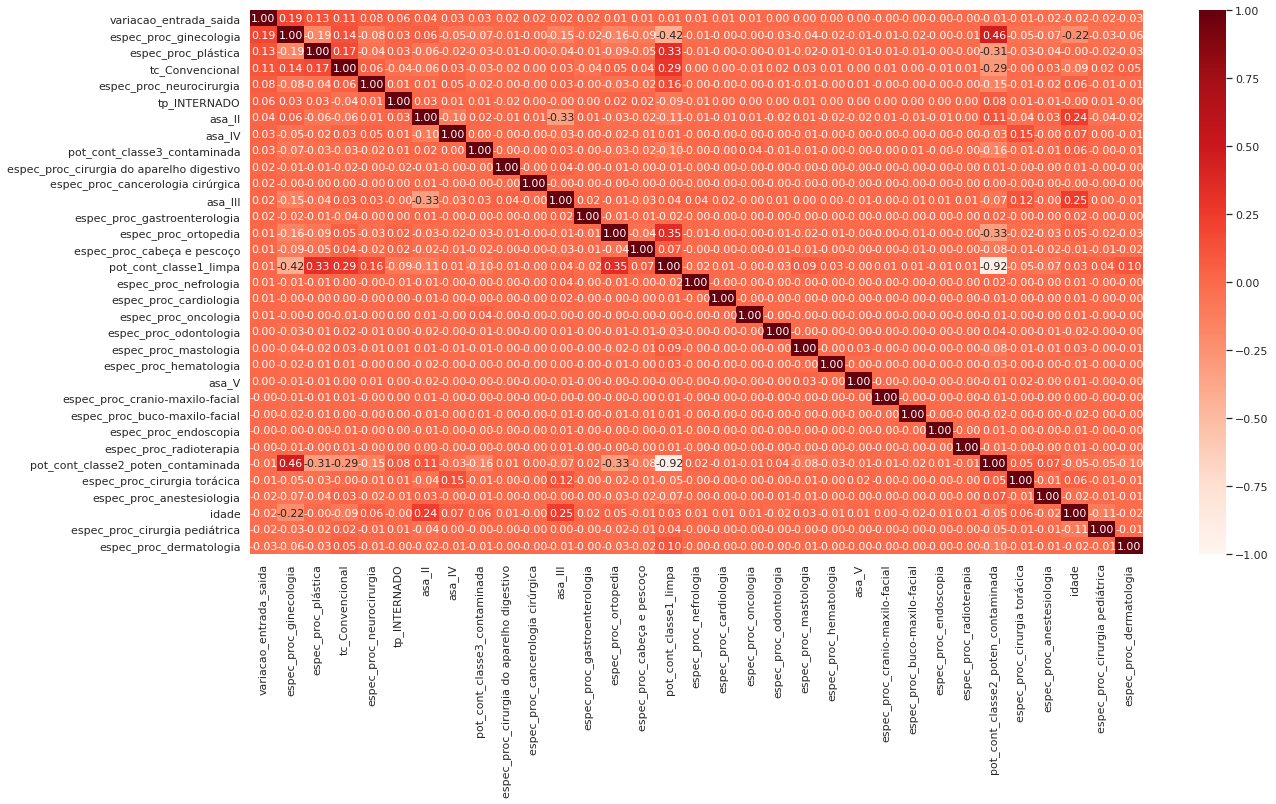

In [ ]:
correlations = df_an.corr()
k = 33
cols = correlations.nlargest(k, "variacao_entrada_saida")["variacao_entrada_saida"].index
cm = np.corrcoef(df_an[cols].values.T)
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (20, 10))
ax = sns.heatmap(cm, vmin = -1, vmax = 1, cmap = "Reds", cbar = True, annot = True, square = False, 
                 fmt = ".2f", annot_kws = {"size": 11}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [ ]:
df_an.columns = [j.strip().replace(' ', '_').replace('-', '_').lower() for j in df_an.columns]

In [ ]:
df_an.columns = [j.replace('\xa0', '_') for j in df_an.columns]

In [ ]:
df_an.shape

(30201, 42)

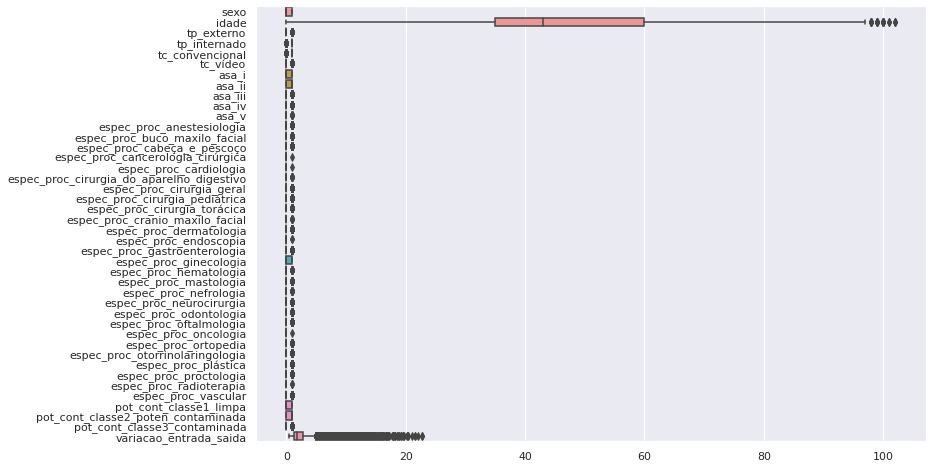

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot (Seaborn)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
sns.boxplot(data = df_an, orient = "h")

In [ ]:
df_an['variacao_entrada_saida'].describe()

count    30201.000000
mean         2.412386
std          2.077034
min          0.385556
25%          1.213889
50%          1.758611
75%          2.739722
max         22.706111
Name: variacao_entrada_saida, dtype: float64

In [ ]:
# Scaling (min / max target)
from sklearn.preprocessing import MinMaxScaler

array = df_an.values

# features [X] e label [y]
X = array[:, 0:41]
y = array[:, 41]

# Transformando os dados
transformer = MinMaxScaler(feature_range = ( 0.385556, 22.706111))
X_rescaled = transformer.fit_transform(X)

# Sumarizando os dados transformados
print("Dados originais:\n\n", X)
print("\nDados transformados:\n\n", X_rescaled)

Dados originais:

 [[ 0. 24.  0. ...  0.  1.  0.]
 [ 0. 56.  0. ...  1.  0.  0.]
 [ 1. 56.  0. ...  1.  0.  0.]
 ...
 [ 0.  7.  0. ...  0.  1.  0.]
 [ 1.  7.  0. ...  1.  0.  0.]
 [ 0. 43.  0. ...  0.  1.  0.]]

Dados transformados:

 [[ 0.385556    5.63745129  0.385556   ...  0.385556   22.706111
   0.385556  ]
 [ 0.385556   12.63997835  0.385556   ... 22.706111    0.385556
   0.385556  ]
 [22.706111   12.63997835  0.385556   ... 22.706111    0.385556
   0.385556  ]
 ...
 [ 0.385556    1.91735879  0.385556   ...  0.385556   22.706111
   0.385556  ]
 [22.706111    1.91735879  0.385556   ... 22.706111    0.385556
   0.385556  ]
 [ 0.385556    9.79520174  0.385556   ...  0.385556   22.706111
   0.385556  ]]


In [ ]:
print(X)

[[ 0. 24.  0. ...  0.  1.  0.]
 [ 0. 56.  0. ...  1.  0.  0.]
 [ 1. 56.  0. ...  1.  0.  0.]
 ...
 [ 0.  7.  0. ...  0.  1.  0.]
 [ 1.  7.  0. ...  1.  0.  0.]
 [ 0. 43.  0. ...  0.  1.  0.]]


In [ ]:
# Reconstruindo o DataFrame
df_an = pd.DataFrame()

df_an = pd.DataFrame({'sexo': X_rescaled[:, 0],
 'idade': X_rescaled[:, 1],
 'tp_EXTERNO': X_rescaled[:, 2],
 'tp_INTERNADO': X_rescaled[:, 3],
 'tc_Convencional': X_rescaled[:, 4],
 'tc_Vídeo': X_rescaled[:, 5],
 'asa_I': X_rescaled[:, 6],
 'asa_II': X_rescaled[:, 7],
 'asa_III': X_rescaled[:, 8],
 'asa_IV': X_rescaled[:, 9],
 'asa_V': X_rescaled[:, 10],
 'espec_proc_anestesiologia': X_rescaled[:, 11],
 'espec_proc_buco-maxilo-facial': X_rescaled[:, 12],
 'espec_proc_cabeça e pescoço': X_rescaled[:, 13],
 'espec_proc_cancerologia cirúrgica': X_rescaled[:, 14],
 'espec_proc_cardiologia': X_rescaled[:, 15],
 'espec_proc_cirurgia do aparelho digestivo': X_rescaled[:, 16],
 'espec_proc_cirurgia geral': X_rescaled[:, 17],
 'espec_proc_cirurgia pediátrica': X_rescaled[:, 18],
 'espec_proc_cirurgia torácica': X_rescaled[:, 19],
 'espec_proc_cranio-maxilo-facial': X_rescaled[:, 20],
 'espec_proc_dermatologia': X_rescaled[:, 21],
 'espec_proc_endoscopia': X_rescaled[:, 22],
 'espec_proc_gastroenterologia': X_rescaled[:, 23],
 'espec_proc_ginecologia': X_rescaled[:, 24],
 'espec_proc_hematologia': X_rescaled[:, 25],
 'espec_proc_mastologia': X_rescaled[:, 26],
 'espec_proc_nefrologia': X_rescaled[:, 27],
 'espec_proc_neurocirurgia': X_rescaled[:, 28],
 'espec_proc_odontologia': X_rescaled[:, 29],
 'espec_proc_oftalmologia': X_rescaled[:, 30],
 'espec_proc_oncologia': X_rescaled[:, 31],
 'espec_proc_ortopedia': X_rescaled[:, 32],
 'espec_proc_otorrinolaringologia': X_rescaled[:, 33],
 'espec_proc_plástica': X_rescaled[:, 34],
 'espec_proc_proctologia': X_rescaled[:, 35],
 'espec_proc_radioterapia': X_rescaled[:, 36],
 'espec_proc_vascular': X_rescaled[:, 37],
 'pot_cont_classe1_limpa': X_rescaled[:, 38],
 'pot_cont_classe2_poten_contaminada': X_rescaled[:, 39],
 'pot_cont_classe3_contaminada': X_rescaled[:, 40],
 'variacao_entrada_saida' : y})    
    
df_an.head(10)

,sexo,idade,tp_EXTERNO,tp_INTERNADO,tc_Convencional,tc_Vídeo,asa_I,asa_II,asa_III,asa_IV,asa_V,espec_proc_anestesiologia,espec_proc_buco-maxilo-facial,espec_proc_cabeça e pescoço,espec_proc_cancerologia cirúrgica,espec_proc_cardiologia,espec_proc_cirurgia do aparelho digestivo,espec_proc_cirurgia geral,espec_proc_cirurgia pediátrica,espec_proc_cirurgia torácica,espec_proc_cranio-maxilo-facial,espec_proc_dermatologia,espec_proc_endoscopia,espec_proc_gastroenterologia,espec_proc_ginecologia,espec_proc_hematologia,espec_proc_mastologia,espec_proc_nefrologia,espec_proc_neurocirurgia,espec_proc_odontologia,espec_proc_oftalmologia,espec_proc_oncologia,espec_proc_ortopedia,espec_proc_otorrinolaringologia,espec_proc_plástica,espec_proc_proctologia,espec_proc_radioterapia,espec_proc_vascular,pot_cont_classe1_limpa,pot_cont_classe2_poten_contaminada,pot_cont_classe3_contaminada,variacao_entrada_saida
0,0.385556,5.637451,0.385556,22.706111,22.706111,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,3.030278
1,0.385556,12.639978,0.385556,22.706111,22.706111,0.385556,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,0.385556,8.513611
2,22.706111,12.639978,0.385556,22.706111,0.385556,22.706111,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,0.385556,4.118333
3,22.706111,7.606912,0.385556,22.706111,0.385556,22.706111,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,3.380000
4,0.385556,12.639978,0.385556,22.706111,22.706111,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,0.385556,2.909167
5,0.385556,19.423676,0.385556,22.706111,22.706111,0.385556,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,0.385556,2.789167
6,0.385556,9.576373,0.385556,22.706111,22.706111,0.385556,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,22.706111,0.385556,0.385556,2.127500
7,22.706111,1.260872,0.385556,22.706111,22.706111,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,0.385556,22.706111,0.385556,0.385556,1.307222
8,22.7061

In [ ]:
df_an.columns

Index(['sexo', 'idade', 'tp_EXTERNO', 'tp_INTERNADO', 'tc_Convencional',
       'tc_Vídeo', 'asa_I', 'asa_II', 'asa_III', 'asa_IV', 'asa_V',
       'espec_proc_anestesiologia', 'espec_proc_buco-maxilo-facial',
       'espec_proc_cabeça e pescoço', 'espec_proc_cancerologia cirúrgica',
       'espec_proc_cardiologia', 'espec_proc_cirurgia do aparelho digestivo',
       'espec_proc_cirurgia geral', 'espec_proc_cirurgia pediátrica',
       'espec_proc_cirurgia torácica', 'espec_proc_cranio-maxilo-facial',
       'espec_proc_dermatologia', 'espec_proc_endoscopia',
       'espec_proc_gastroenterologia', 'espec_proc_ginecologia',
       'espec_proc_hematologia', 'espec_proc_mastologia',
       'espec_proc_nefrologia', 'espec_proc_neurocirurgia',
       'espec_proc_odontologia', 'espec_proc_oftalmologia',
       'espec_proc_oncologia', 'espec_proc_ortopedia',
       'espec_proc_otorrinolaringologia', 'espec_proc_plástica',
       'espec_proc_proctologia', 'espec_proc_radioterapia',
       'esp

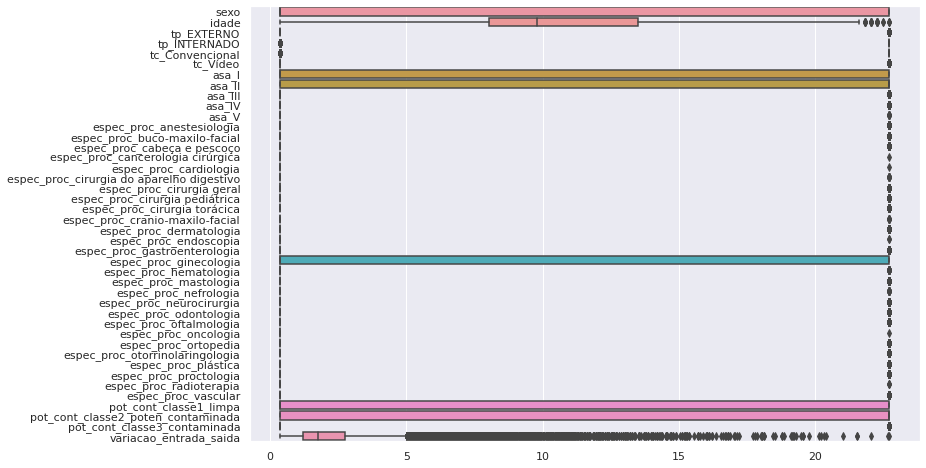

In [ ]:
# Boxplot (Seaborn)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
sns.boxplot(data = df_an, orient = "h")

In [ ]:
df_an.dtypes

sexo                                         float64
idade                                        float64
tp_EXTERNO                                   float64
tp_INTERNADO                                 float64
tc_Convencional                              float64
tc_Vídeo                                     float64
asa_I                                        float64
asa_II                                       float64
asa_III                                      float64
asa_IV                                       float64
asa_V                                        float64
espec_proc_anestesiologia                    float64
espec_proc_buco-maxilo-facial                float64
espec_proc_cabeça e pescoço                  float64
espec_proc_cancerologia cirúrgica            float64
espec_proc_cardiologia                       float64
espec_proc_cirurgia do aparelho digestivo    float64
espec_proc_cirurgia geral                    float64
espec_proc_cirurgia pediátrica               f

In [ ]:
df_an = df_an[['sexo', 'idade', 'tp_EXTERNO', 'tp_INTERNADO', 'tc_Convencional',
       'tc_Vídeo', 'asa_I', 'asa_II', 'asa_III', 'asa_IV', 'asa_V',
       'espec_proc_anestesiologia', 'espec_proc_buco-maxilo-facial',
       'espec_proc_cabeça e pescoço', 'espec_proc_cancerologia cirúrgica',
       'espec_proc_cardiologia', 'espec_proc_cirurgia do aparelho digestivo',
       'espec_proc_cirurgia geral', 'espec_proc_cirurgia pediátrica',
       'espec_proc_cirurgia torácica', 'espec_proc_cranio-maxilo-facial',
       'espec_proc_dermatologia', 'espec_proc_endoscopia',
       'espec_proc_gastroenterologia', 'espec_proc_ginecologia',
       'espec_proc_hematologia', 'espec_proc_mastologia',
       'espec_proc_nefrologia', 'espec_proc_neurocirurgia',
       'espec_proc_odontologia', 'espec_proc_oftalmologia',
       'espec_proc_oncologia', 'espec_proc_ortopedia',
       'espec_proc_otorrinolaringologia', 'espec_proc_plástica',
       'espec_proc_proctologia', 'espec_proc_radioterapia',
       'espec_proc_vascular', 'pot_cont_classe1_limpa',
       'pot_cont_classe2_poten_contaminada', 'pot_cont_classe3_contaminada',
       'variacao_entrada_saida']]

In [ ]:
#Definindo as features [X], o label [y] e o valor de seed para controlar a aleatoriedade

# features [X] e label [y]

array = df_an.values

X = array[:, 0:40]
y = array[:, 40]

In [ ]:
# Tratamento da aleatoriedade para garantir que os mesmos dados sejam sempre reproduzidos da mesma maneira
# Importante para garantir a justa comparação de performance entre os algoritmos de Machine Learning
seed = 1234

In [ ]:
df_an

,sexo,idade,tp_EXTERNO,tp_INTERNADO,tc_Convencional,tc_Vídeo,asa_I,asa_II,asa_III,asa_IV,asa_V,espec_proc_anestesiologia,espec_proc_buco-maxilo-facial,espec_proc_cabeça e pescoço,espec_proc_cancerologia cirúrgica,espec_proc_cardiologia,espec_proc_cirurgia do aparelho digestivo,espec_proc_cirurgia geral,espec_proc_cirurgia pediátrica,espec_proc_cirurgia torácica,espec_proc_cranio-maxilo-facial,espec_proc_dermatologia,espec_proc_endoscopia,espec_proc_gastroenterologia,espec_proc_ginecologia,espec_proc_hematologia,espec_proc_mastologia,espec_proc_nefrologia,espec_proc_neurocirurgia,espec_proc_odontologia,espec_proc_oftalmologia,espec_proc_oncologia,espec_proc_ortopedia,espec_proc_otorrinolaringologia,espec_proc_plástica,espec_proc_proctologia,espec_proc_radioterapia,espec_proc_vascular,pot_cont_classe1_limpa,pot_cont_classe2_poten_contaminada,pot_cont_classe3_contaminada,variacao_entrada_saida
0,0.0,0.235294,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.030278
1,0.0,0.549020,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.513611
2,1.0,0.549020,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.118333
3,1.0,0.323529,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.380000
4,0.0,0.549020,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.909167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30196,0.0,0.470588,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.695278
30197,0.0,0.049020,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.612778
30198,0.0,0.068627,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.040278
30199,1.0,0.068627,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.140556


In [ ]:
# Calculando VIF
# (VIF) é uma medida de colinearidade entre variáveis ​​preditoras em uma regressão múltipla. 
# É calculado tomando a razão da variância de todos os betas de um determinado modelo dividido pela variana de um único beta se ele fosse ajustado sozinho.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = df_an.columns[0:40]

vif.round(1)

# Conforme esperado, a variável tp_INTERNADO tem um alto valor de VIF, tendo em vista que a sua natureza indica uma internação,  
# o que naturalmente acontece na preparação de procedimentos cirúrgicos. Diante da multicolinearidade, 
# a variável ​​em questão deve será removida, uma vez que a presença da multicolinearidade implica que a informação que 
# esta variável fornece sobre a resposta é redundante na presença das outras variáveis. Após a remoção recalcularemos o VIF.

,VIF Factor,features
0,1.5,sexo
1,1.4,idade
2,25.0,tp_EXTERNO
3,24.9,tp_INTERNADO
4,14.8,tc_Convencional
5,14.1,tc_Vídeo
6,950.7,asa_I
7,1468.4,asa_II
8,211.8,asa_III
9,21.7,asa_IV


In [ ]:
df_an = df_an[['sexo', 'idade', 'tp_EXTERNO', 'tc_Convencional',
       'tc_Vídeo', 'asa_I', 'asa_II', 'asa_III', 'asa_IV', 'asa_V',
       'espec_proc_anestesiologia', 'espec_proc_buco-maxilo-facial',
       'espec_proc_cabeça e pescoço', 'espec_proc_cancerologia cirúrgica',
       'espec_proc_cardiologia', 'espec_proc_cirurgia do aparelho digestivo',
       'espec_proc_cirurgia geral', 'espec_proc_cirurgia pediátrica',
       'espec_proc_cirurgia torácica', 'espec_proc_cranio-maxilo-facial',
       'espec_proc_dermatologia', 'espec_proc_endoscopia',
       'espec_proc_gastroenterologia', 'espec_proc_ginecologia',
       'espec_proc_hematologia', 'espec_proc_mastologia',
       'espec_proc_nefrologia', 'espec_proc_neurocirurgia',
       'espec_proc_odontologia', 'espec_proc_oftalmologia',
       'espec_proc_oncologia', 'espec_proc_ortopedia',
       'espec_proc_otorrinolaringologia', 'espec_proc_plástica',
       'espec_proc_proctologia', 'espec_proc_radioterapia',
       'espec_proc_vascular', 'pot_cont_classe1_limpa',
       'pot_cont_classe2_poten_contaminada', 'pot_cont_classe3_contaminada',
       'variacao_entrada_saida']]

In [ ]:
#Definindo as features [X], o label [y] e o valor de seed para controlar a aleatoriedade

# features [X] e label [y]

array = df_an.values

X = array[:, 0:39]
y = array[:, 39]

In [ ]:
# Calculando VIF
# (VIF) é uma medida de colinearidade entre variáveis ​​preditoras em uma regressão múltipla. 
# É calculado tomando a razão da variância de todos os betas de um determinado modelo dividido pela variana de um único beta se ele fosse ajustado sozinho.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = df_an.columns[0:39]

vif.round(1)

# Removendo a variável tp_INTERNADO observamos uma melhora significativa nos valores de VIF. Seguiremos com este conjunto de dados.

,VIF Factor,features
0,1.5,sexo
1,1.4,idade
2,1.1,tp_EXTERNO
3,14.8,tc_Convencional
4,14.1,tc_Vídeo
5,47.0,asa_I
6,74.1,asa_II
7,12.0,asa_III
8,2.1,asa_IV
9,1.0,asa_V


ranking das features:

1. feature 38 - pot_cont_classe2_poten_contaminada (0.279680)
2. feature 1 - idade (0.250680)
3. feature 37 - pot_cont_classe1_limpa (0.187938)
4. feature 34 - espec_proc_proctologia (0.120292)
5. feature 3 - tc_Convencional (0.046065)
6. feature 0 - sexo (0.029836)
7. feature 6 - asa_II (0.023600)
8. feature 16 - espec_proc_cirurgia geral (0.014780)
9. feature 7 - asa_III (0.009718)
10. feature 23 - espec_proc_ginecologia (0.005755)
11. feature 5 - asa_I (0.005582)
12. feature 8 - asa_IV (0.004778)
13. feature 32 - espec_proc_otorrinolaringologia (0.004329)
14. feature 33 - espec_proc_plástica (0.003892)
15. feature 10 - espec_proc_anestesiologia (0.003801)
16. feature 30 - espec_proc_oncologia (0.002332)
17. feature 4 - tc_Vídeo (0.002116)
18. feature 9 - asa_V (0.001398)
19. feature 36 - espec_proc_vascular (0.001024)
20. feature 2 - tp_EXTERNO (0.001023)
21. feature 31 - espec_proc_ortopedia (0.000618)
22. feature 17 - espec_proc_cirurgia pediátrica (0.000252

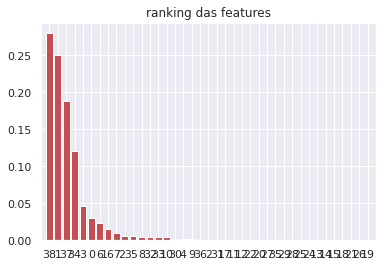

In [ ]:
# ExtraTreesRegressor

# Import dos Módulos
from sklearn.ensemble import ExtraTreesRegressor

# Criação do Modelo - Feature Selection
modelo = ExtraTreesRegressor(random_state=seed)
modelo.fit(X, y)

# Imprimindo os resultados
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]

print("ranking das features:")
print()
for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], df_an.columns[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("ranking das features")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Cross Validation

# Import dos módulos
from sklearn.model_selection import KFold

# Definindo os valores para o número de folds
num_folds = 5

# Separando os dados em folds
kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)

# Import dos módulos

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

# Definindo e Construindo os Scores
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def accuracy(y_true, y_pred): return accuracy_score(y_true, y_pred)
def precision(y_true, y_pred): return precision_score(y_true, y_pred)
def recall(y_true, y_pred): return recall_score(y_true, y_pred)
def f1(y_true, y_pred): return f1_score(y_true, y_pred)
def balanced_accuracy(y_true, y_pred): return balanced_accuracy_score(y_true, y_pred)
def roc_auc(y_true, y_pred): return roc_auc_score(y_true, y_pred)

scoring = {'tn' : make_scorer(tn), 'fp' : make_scorer(fp),
           'fn' : make_scorer(fn), 'tp' : make_scorer(tp), 
           'accuracy' : make_scorer(accuracy), 
           'precision' : make_scorer(precision), 
           'recall' : make_scorer(recall), 
           'f1' : make_scorer(f1), 
           'balanced_accuracy' : make_scorer(balanced_accuracy), 
           'roc_auc' : make_scorer(roc_auc), 
          }

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

# Preparando a lista de algoritmos
modelos = []
modelos.append(('LogisticRegression', LogisticRegression(random_state = seed, max_iter=400)))
modelos.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis())) # não possui o parâmetro "random_state"
modelos.append(('SVC', SVC(random_state = seed)))
modelos.append(('SGDRegressor', SGDClassifier(random_state = seed)))
modelos.append(('KNeighborsRegressor', KNeighborsClassifier())) # não possui o parâmetro "random_state"
modelos.append(('GaussianNB', GaussianNB())) # não possui o parâmetro "random_state"
modelos.append(('DecisionTreeRegressor', DecisionTreeClassifier(random_state = seed)))
modelos.append(('RandomForestRegressor', RandomForestClassifier(random_state = seed)))
modelos.append(('AdaBoostRegressor', AdaBoostClassifier(random_state = seed)))
modelos.append(('MLPRegressor', MLPClassifier(max_iter=600, random_state = seed)))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    cv_results_1 = cross_validate(modelo, X, y, scoring=scoring, cv=kfold)
    cv_results_2 = cross_val_predict(modelo, X, y, cv=kfold)
    print('+', '-'*len(nome), '+')
    print('|', nome, '|')
    print()
    print('Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation')
    print('> accuracy            : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_accuracy']), np.std(cv_results_1['test_accuracy'])))
    print('> precision           : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_precision']), np.std(cv_results_1['test_precision'])))
    print('> recall              : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_recall']), np.std(cv_results_1['test_recall'])))
    print('> f1                  : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_f1']), np.std(cv_results_1['test_f1'])))
    print('> balanced_accuracy   : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_balanced_accuracy']), np.std(cv_results_1['test_balanced_accuracy'])))
    print('> roc-auc             : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_roc_auc']), np.std(cv_results_1['test_roc_auc'])))
    print()
    print('Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate')
    print('> TN                  : {:0.4f}'.format(np.sum(cv_results_1['test_tn'])))
    print('> FP                  : {:0.4f}'.format(np.sum(cv_results_1['test_fp']))) 
    print('> FN                  : {:0.4f}'.format(np.sum(cv_results_1['test_fn']))) 
    print('> TP                  : {:0.4f}'.format(np.sum(cv_results_1['test_tp'])))
    c_matrix = confusion_matrix(y, cv_results_2)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Reds')
    plt.show()
    print('Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate')
    TN = np.sum(cv_results_1['test_tn'])
    FP = np.sum(cv_results_1['test_fp'])
    FN = np.sum(cv_results_1['test_fn'])
    TP = np.sum(cv_results_1['test_tp'])
    accuracy = (TN+TP)/(TN+FP+FN+TP)
    print('> accuracy            : %0.4f' % accuracy)
    precision = (TP)/(TP+FP)
    print('> precision           : %0.4f' % precision)
    recall = (TP)/(TP+FN) # sensitivity, hit rate ou true positive rate (TPR)
    print('> recall              : %0.4f' % recall)
    f1 = (2*precision*recall)/(precision+recall)
    print('> f1                  : %0.4f' % f1)
    sensibility = (TP)/(TP+FN) # recall, hit rate ou true positive rate (TPR)
    print('> sensibility         : %0.4f' % sensibility)
    specificity = (TN)/(TN+FP) # selectivity ou true negative rate (TNR)
    print('> specificity         : %0.4f' % specificity)
    balanced_accuracy = (sensibility+specificity)/(2)
    print('> balanced_accuracy   : %0.4f' % balanced_accuracy)
    print()

NameError: ignored

 -------------------

Algoritimo selecionado para utilização:

| KNeighborsRegressor |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation

> accuracy            : 0.9895 (+/- 1std 0.0006)

> precision           : 0.6985 (+/- 1std 0.0377)

> recall              : 0.6681 (+/- 1std 0.0527)

> f1                  : 0.6808 (+/- 1std 0.0253)

> balanced_accuracy   : 0.8316 (+/- 1std 0.0260)

> roc-auc             : 0.8316 (+/- 1std 0.0260)

 -------------------

In [ ]:
# features [X] e label [y]

array = df_an.values

X = array[:, 0:39]
y = array[:, 39]

In [ ]:
from sklearn.model_selection import GridSearchCV

# Selecionando o algorithm
algorithm = KNeighborsRegressor()

# Adotaremos a abordagem sobre o uso da validação cruzada k-fold.

kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Hiperparametros candidatos
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

# Encontrando os melhores hiperparametros
# passar esse algoritmo e conjunto de hiperparâmetros para a função GridSearchCV (), 
# pedindo-lhe para usar R-quadrado para avaliar os modelos que cria. Ajustamos cada modelo que ele cria usando os dados de treinamento.
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X, y)

# Resultados
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.021767522902719015
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')
{'n_neighbors': 6, 'weights': 'uniform'}


In [ ]:
# Criando o modelo
modelo_opt = KNeighborsRegressor(n_neighbors= 6, weights='uniform')

# Treinamento do modelo otimizado em todo o dataset
modelo_opt.fit(X, y)

# Fazendo as previsões
y_pred_opt = modelo_opt.predict(X)

# Imprimindo a  métrica 

from sklearn.metrics import explained_variance_score

m1 = explained_variance_score(y, y_pred_opt) #Função de pontuação de regressão de variância explicada. A melhor pontuação possível é 1,0; valores mais baixos são piores.

print('Função de pontuação de regressão de variância explicada', m1)

from sklearn.metrics import max_error

m2 = max_error(y, y_pred_opt) #Erro residual máximo

print('Erro residual máximo',m2)

from sklearn.metrics import r2_score 

m3 = r2_score(y, y_pred_opt) # Coeficiente de determinação, função de pontuação de regressão. A melhor pontuação possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior).

print('Coeficiente de determinação',m3)

Função de pontuação de regressão de variância explicada 0.03537533982957686
Erro residual máximo 21.158749999999998
Coeficiente de determinação 0.026626177040314114


----------------
ALGORITMO 2: Inicia a tratativa descritiva para preparação da base com fim para o algoritmo

In [ ]:
df_ml #agora a variável "variacao_entrada_saida" que é a target do algoritmo anterior, se torna parametro para o segundo algoritmo (cascata)

,sexo,tipo_passagem,tecnica_cirurgica,potencial_contaminacao,especialidade_procedimento,asa,idade,variacao_entrada_saida,intercorrencia_intraop,tipo_intercorrencia_intraop,tp_EXTERNO,tp_INTERNADO,tc_Convencional,tc_Vídeo,asa_I,asa_II,asa_III,asa_IV,asa_V,espec_proc_anestesiologia,espec_proc_buco-maxilo-facial,espec_proc_cabeça e pescoço,espec_proc_cancerologia cirúrgica,espec_proc_cardiologia,espec_proc_cirurgia do aparelho digestivo,espec_proc_cirurgia geral,espec_proc_cirurgia pediátrica,espec_proc_cirurgia torácica,espec_proc_cranio-maxilo-facial,espec_proc_dermatologia,espec_proc_endoscopia,espec_proc_gastroenterologia,espec_proc_ginecologia,espec_proc_hematologia,espec_proc_mastologia,espec_proc_nefrologia,espec_proc_neurocirurgia,espec_proc_odontologia,espec_proc_oftalmologia,espec_proc_oncologia,espec_proc_ortopedia,espec_proc_otorrinolaringologia,espec_proc_plástica,espec_proc_proctologia,espec_proc_radioterapia,espec_proc_vascular,pot_cont_classe1_limpa,pot_cont_classe2_poten_contaminada,pot_cont_classe3_contaminada
0,0,INTERNADO,Convencional,classe2_poten_contaminada,cabeça e pescoço,I,24,3.030278,N,Não Informado,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,INTERNADO,Convencional,classe1_limpa,neurocirurgia,II,56,8.513611,N,Não Informado,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,INTERNADO,Vídeo,classe1_limpa,neurocirurgia,II,56,4.118333,N,Não Informado,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,INTERNADO,Vídeo,classe2_poten_contaminada,cirurgia geral,II,33,3.380000,N,Não Informado,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,INTERNADO,Convencional,classe1_limpa,ortopedia,I,56,2.909167,N,Não Informado,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35488,0,INTERNADO,Convencional,classe1_limpa,plástica,I,48,1.695278,N,Não Informado,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
35490,0,INTERNADO,Convencional,classe2_poten_contaminada,oftalmologia,II,5,1.612778,N,Não Informado,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
35491,0,INTERNADO,Convencional,classe2_poten_contaminada,oftalmologia,I,7,1.040278,N,Não Informado,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
35492,1,INTERNADO,Convencional,classe1_limpa,urologia,I,7,1.140556,N,Não Informado,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Nesse dataset só nos interessa casos onde ocorreram intercorrencias (intercorrencia_intraop = "S")

In [ ]:
df_ml = df_ml[df_ml['intercorrencia_intraop'] == "S"]
df_ml.shape

(1162, 49)

In [ ]:
df_ml['intercorrencia_intraop'].value_counts()

S    1162
Name: intercorrencia_intraop, dtype: int64

In [ ]:
df_ml.groupby(['tipo_intercorrencia_intraop']).size()

In [ ]:
# reduzindo os valores não informados
df_ml = df_ml[df_ml['tipo_intercorrencia_intraop'] != 'Não Informado']
df_ml.tipo_intercorrencia_intraop.value_counts()

In [ ]:
# criando as variáveis dummies
df_dummy = pd.get_dummies(df_ml['tipo_intercorrencia_intraop'], prefix='tii', prefix_sep='_')
df_dummy.head()

In [ ]:
# concatenando os DataFrames
df_ml = pd.concat([df_ml, df_dummy], axis=1)
print(df_ml.shape)
display(df_ml.head())

In [ ]:
# removendo uma variável
df_ml = df_ml.drop(['tii_Óbito'], axis=1)

In [ ]:
df_ml

In [ ]:
df_an = df_ml.drop(['tipo_passagem','tecnica_cirurgica','potencial_contaminacao','especialidade_procedimento','asa','intercorrencia_intraop','tipo_intercorrencia_intraop'], axis=1)

In [ ]:
cols = df_an.columns.tolist()
cols

In [ ]:
df_an

In [ ]:
df_an = df_an[['sexo',
 'idade',
 'tp_EXTERNO',
 'tc_Convencional',
 'tc_Vídeo',
 'asa_I',
 'asa_II',
 'asa_III',
 'asa_IV',
 'asa_V',
 'espec_proc_anestesiologia',
 'espec_proc_buco-maxilo-facial',
 'espec_proc_cabeça e pescoço',
 'espec_proc_cancerologia cirúrgica',
 'espec_proc_cardiologia',
 'espec_proc_cirurgia do aparelho digestivo',
 'espec_proc_cirurgia geral',
 'espec_proc_cirurgia pediátrica',
 'espec_proc_cirurgia torácica',
 'espec_proc_cranio-maxilo-facial',
 'espec_proc_dermatologia',
 'espec_proc_endoscopia',
 'espec_proc_gastroenterologia',
 'espec_proc_ginecologia',
 'espec_proc_hematologia',
 'espec_proc_mastologia',
 'espec_proc_nefrologia',
 'espec_proc_neurocirurgia',
 'espec_proc_odontologia',
 'espec_proc_oftalmologia',
 'espec_proc_oncologia',
 'espec_proc_ortopedia',
 'espec_proc_otorrinolaringologia',
 'espec_proc_plástica',
 'espec_proc_proctologia',
 'espec_proc_radioterapia',
 'espec_proc_vascular',
 'pot_cont_classe1_limpa',
 'pot_cont_classe2_poten_contaminada',
 'pot_cont_classe3_contaminada',
 'tii_Arritimias cardíacas',
 'tii_Aspiração de Conteudo Gástrico',
 'tii_Bradicardia',
 'tii_Broncoespasmo',
 'tii_Convulsões',
 'tii_Dificuldade de Intubação não Prevista',
 'tii_Erro de Administração de Fármacos',
 'tii_Falha de Bloqueio',
 'tii_Falha de Equipamentos',
 'tii_Falha de Intubação',
 'tii_Hipertensão arterial significativa (drogas)',
 'tii_Laringoespasmo',
 'tii_Lesão Dentária',
 'tii_Mudança de Técnica Anéstesica Planejada',
 'tii_Parada Cardíaca',
 'tii_Punção Acidental de Dura Máter',
 'tii_Queda de saturação',
 'tii_Reação Alérgica',
 'tii_Reação Anafilática / Anafilactóide',
 'variacao_entrada_saida']]

In [ ]:
df_an

In [ ]:
#Definindo as features [X], o label [y] e o valor de seed para controlar a aleatoriedade

# features [X] e label [y]

array = df_an.values

X = array[:, 0:59]
y = array[:, 59]

In [ ]:
# Calculando VIF
# (VIF) é uma medida de colinearidade entre variáveis ​​preditoras em uma regressão múltipla. 
# É calculado tomando a razão da variância de todos os betas de um determinado modelo dividido pela variana de um único beta se ele fosse ajustado sozinho.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = df_an.columns[0:59]

vif.round(1)

# Removendo a variável tp_INTERNADO observamos uma melhora significativa nos valores de VIF. Seguiremos com este conjunto de dados.

In [ ]:
vif[vif['VIF Factor']>15] # analise de variaveis com VIF alto

In [ ]:
from sklearn.model_selection import GridSearchCV

# Selecionando o algorithm
algorithm = KNeighborsRegressor()

# Adotaremos a abordagem sobre o uso da validação cruzada k-fold.

kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Hiperparametros candidatos
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

# Encontrando os melhores hiperparametros
# passar esse algoritmo e conjunto de hiperparâmetros para a função GridSearchCV (), 
# pedindo-lhe para usar R-quadrado para avaliar os modelos que cria. Ajustamos cada modelo que ele cria usando os dados de treinamento.
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X, y)

# Resultados
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Criando o modelo
modelo_opt = KNeighborsRegressor(n_neighbors= 6, weights='uniform')

# Treinamento do modelo otimizado em todo o dataset
modelo_opt.fit(X, y)

# Fazendo as previsões
y_pred_opt = modelo_opt.predict(X)

# Imprimindo a  métrica 

from sklearn.metrics import explained_variance_score

m1 = explained_variance_score(y, y_pred_opt) #Função de pontuação de regressão de variância explicada. A melhor pontuação possível é 1,0; valores mais baixos são piores.

print('Função de pontuação de regressão de variância explicada', m1)

from sklearn.metrics import max_error

m2 = max_error(y, y_pred_opt) #Erro residual máximo

print('Erro residual máximo',m2)

from sklearn.metrics import r2_score 

m3 = r2_score(y, y_pred_opt) # Coeficiente de determinação, função de pontuação de regressão. A melhor pontuação possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior).

print('Coeficiente de determinação',m3)

NameError: ignored